In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

/home/andrei2/anaconda3/envs/py27/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


<IPython.core.display.Javascript object>


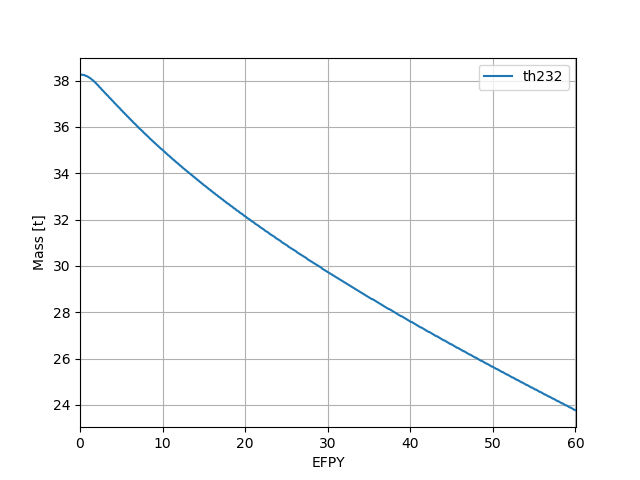

<IPython.core.display.Javascript object>


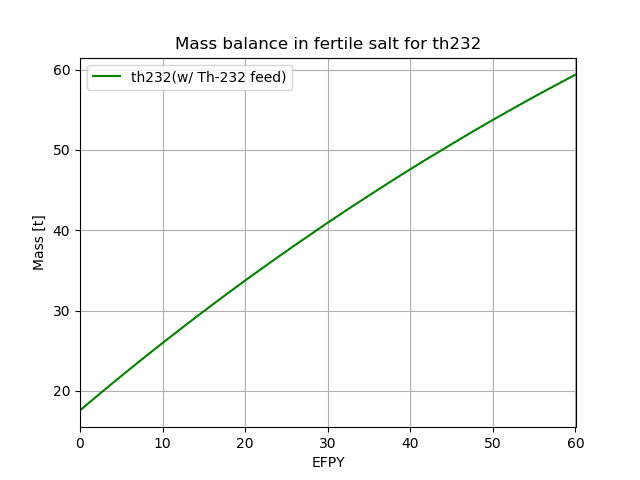

<IPython.core.display.Javascript object>


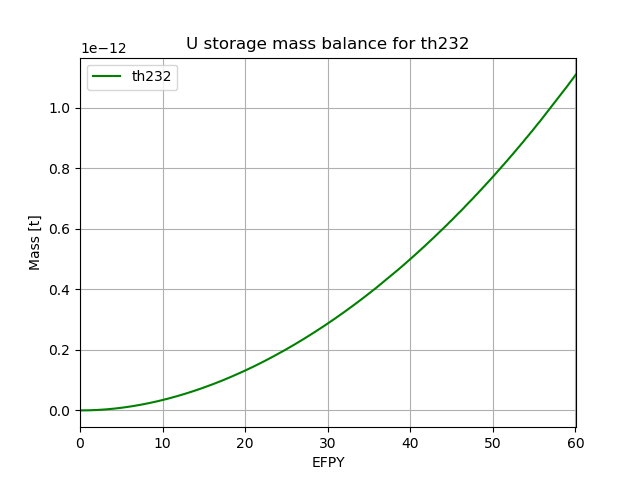

<IPython.core.display.Javascript object>


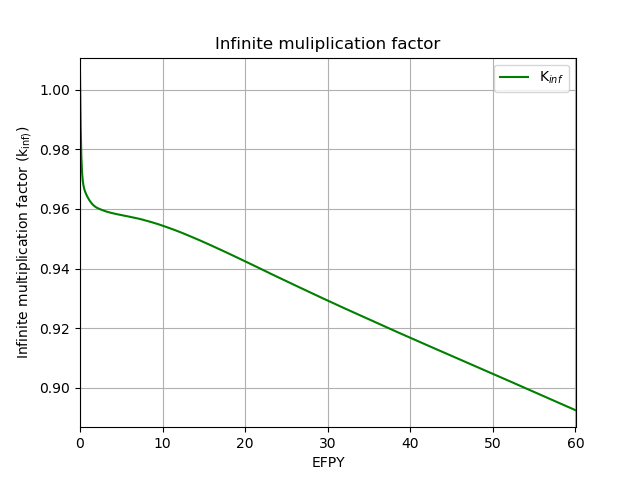


From SCALE
Breeding gain 454.8484697260083 kg/year
Breeding gain coefficient 0.008145697
Breeding gain in blanket 696.3177397031595 kg/year

Doubling time (net) 245.52837962487934
55.839104


In [1]:
%matplotlib notebook 
# Import modules
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import itertools

vol_fuel_se  = [18.0E+6]
vol_blank_se = [7.3E+6]
vol_storage  = [7.3E+6*(50/63498.695312)]#[7.3E+6/1.9097e+04]
iso = 'th232'

#filename_fuel4  = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/msfr_all_removal_th_feed_60yrs.000000000000000000.plt'
#filename_blank4 = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/msfr_all_removal_th_feed_60yrs.000000000000000001.plt'
filename_fuel4  = '/home/andrei2/Dropbox/study/internships/ornl/science/forAndrei/msfr6_withblank/msfr_all_removal_th_feed_60yrs_2.000000000000000000.plt'
filename_blank4 = '/home/andrei2/Dropbox/study/internships/ornl/science/forAndrei/msfr6_withblank/msfr_all_removal_th_feed_60yrs_2.000000000000000001.plt'
filename_u      = '/home/andrei2/Dropbox/study/internships/ornl/science/forAndrei/msfr6_withblank/opus_print.000000000000000000.plt'
k_file4 = '/home/andrei2/Dropbox/study/internships/ornl/science/forAndrei/msfr6_withblank/msfr_all_removal_th_feed_60yrs_2.out'

def read_scale_out (filename):
    iso       = []
    adens     = []
    days_list = []
    with open(filename,'r') as infile:
        for line in itertools.islice(infile, 5, None):  # Skip file header start=6, stop=None
            p = line.split()
            iso.append(str(p[0]))
            adens.append(p[1:])  
            #iso.append(str(p[2]))
            #adens.append(str(p[3]))
    #u_en = 1e-6* np.flip (np.array (upp_enrg, dtype=float), 0 )               # Convert eV to MeV
    #flux = np.flip ( np.array (flux_list, dtype=float), 0 )
    #num_gr = len (u_en)
    days_list.append (iso[0])
    days_list = days_list + adens[0][:]
    adens_arr = np.asarray(adens[1:][:], dtype=np.float32)
    days = np.array (days_list, dtype=np.float32)
    return iso[1:], days/365, adens_arr/1e+6

def read_scale_k (filename):
    kinf = []
    with open(filename) as openfile:
        for line in openfile:
            if line.startswith('      Infinite neutron multiplication'):
                num = line.split(' ')[-1].strip()
                kinf.append(float(num))
    return kinf[1:]

kinf4 = read_scale_k (k_file4)

n_sc4, days_sc, mdens_fuel_sc4          = read_scale_out (filename_fuel4)
n_sc_blanket4, days_sc, mdens_blank_sc4 = read_scale_out (filename_blank4)
n_sc_u, days_sc_u, mdens_u              = read_scale_out (filename_u)

tot_mass_sc = mdens_fuel_sc4[n_sc4.index(iso),]*vol_fuel_se[0]+mdens_blank_sc4[n_sc_blanket4.index(iso),]*vol_blank_se[0]+vol_storage[0]*mdens_u[n_sc_u.index(iso),]
gain_rate = 1e-3*365*(tot_mass_sc[-1] - tot_mass_sc[0])/days_sc[-1]

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format (style='sci',scilimits=(0,0),axis='y')
#ax.set_ylim(0,0.00555)
#for i in [n_se1.index(iso.capitalize())]:
#    ax.plot(days, mdens_fuel_se1[i,:]*vol_fuel_se[0], '-',color='red',
#            label=nucname.serpent(n_se1[i])+' Serpent(gases removal)')
#for i in [n_se2.index(iso.capitalize())]:
#    ax.plot(days, mdens_fuel_se2[i,:]*vol_fuel_se[0], '--',color='green', 
#            label=nucname.serpent(n_se2[i])+' Serpent(volatile gases, noble metals, \nrare earths&discard)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc[n_sc.index(k)]*vol_fuel_se[0], '-',color='#ff8100', label=k+'(no removals)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc1[n_sc1.index(k)]*vol_fuel_se[0], '+--',color='blue', label=k+'(gases)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc2[n_sc2.index(iso)]*vol_fuel_se[0], '-',color='black', label=k+'(gases&noble)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc3[n_sc3.index(k)]*vol_fuel_se[0], '-',color='red', label=k+'(gases&noble\n&rare earths)')
for k in [iso]:
    ax.plot(days_sc, mdens_fuel_sc4[n_sc4.index(k)]*vol_fuel_se[0], '-', label=k)
#for k in [iso]:
#    ax.plot(days_sc, mdens_blank_sc4[n_sc_blanket4.index(k)]*vol_blank_se[0], '-', label='Blanket')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc4[n_sc4.index(k)]*vol_fuel_se[0]+mdens_blank_sc4[n_sc_blanket4.index(k)]*vol_blank_se[0], 
#            '-', label='Total')
ax.legend(loc=0)
ax.set_ylabel('Mass [t]')
ax.set_xlabel('EFPY')
#ax.set_title('Mass balance in fuel salt for ' + str (iso)+'\n')
#ax.text(0.95, 0.5, 'Breeding gain  '+"{0:.1f}".format(gain_rate)+ ' kg/year', 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.text(0.95, 0.45, 'Breeding gain coeff  '+"{0:.4f}".format((tot_mass_sc[-1] - tot_mass_sc[0])/(tot_mass_sc[0])), 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
ax.set_xlim([0,np.amax(days_sc)])
#ax.set_ylim([0, np.amax(tot_mass_sc)])
fig_1.show()
fig_1.savefig(str(iso)+'_th_feed.png',bbox_inches='tight', dpi=900)
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format (style='sci',scilimits=(0,0),axis='y')
#for i in [n_se.index(iso.capitalize())]:
#    ax.plot(days, mdens_blank_se[i,:]*vol_blank_se[0], '-',color='#ff8100', label=nucname.serpent(n_se[i])+' (no removals)')
#for i in [n_se1.index(iso.capitalize())]:
#    ax.plot(days, mdens_blank_se1[i,:]*vol_blank_se[0], '-',color='red', label=nucname.serpent(n_se1[i])+' Serpent(gases removal)')
#for i in [n_se2.index(iso.capitalize())]:
#    ax.plot(days, mdens_blank_se2[i,:]*vol_blank_se[0], '--',color='blue', label=nucname.serpent(n_se2[i])+' Serpent(volatile gases, noble metals, \nrare earths&discard)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_blank_sc[n_sc_blanket.index(k)]*vol_blank_se[0], '-',color='#ff8100', label=k+'(no removals)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_blank_sc1[n_sc_blanket1.index(k)]*vol_blank_se[0], '+--',color='blue', label=k+'(gases)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_blank_sc2[n_sc_blanket2.index(k)]*vol_blank_se[0], '-',color='black', label=k+'(gases&noble)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_blank_sc3[n_sc_blanket3.index(k)]*vol_blank_se[0], '-',color='red', label=k+'(gases&noble\n&rare earths)')
for k in [iso]:
    ax.plot(days_sc, mdens_blank_sc4[n_sc_blanket4.index(k)]*vol_blank_se[0], '-',color='green', label=k+'(w/ Th-232 feed)')
ax.legend(loc=0)
ax.set_ylabel('Mass [t]')
ax.set_xlabel('EFPY')
ax.set_title('Mass balance in fertile salt for ' + str (iso))
ax.set_xlim([0,np.amax(days_sc)])
fig_2.show()
#fig_2.savefig(str(iso)+'_blanket_chemtr_rem.png',bbox_inches='tight', dpi=700)
# Initialize figure
fig_3 = matplotlib.pyplot.figure(3)
ax = fig_3.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format (style='sci',scilimits=(0,0),axis='y')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc[n_sc.index(k)]*vol_fuel_se[0]+mdens_blank_sc[n_sc_blanket.index(k)]*vol_blank_se[0], '-',
#            color='#ff8100', label=k+'(no removals)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc1[n_sc1.index(k)]*vol_fuel_se[0]+mdens_blank_sc1[n_sc_blanket1.index(k)]*vol_blank_se[0], '+--',
#            color='blue', label=k+'(gases)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc2[n_sc2.index(k)]*vol_fuel_se[0]+mdens_blank_sc2[n_sc_blanket2.index(k)]*vol_blank_se[0], '-',
#            color='black', label=k+'(gases&noble)')
#for k in [iso]:
#    ax.plot(days_sc, mdens_fuel_sc3[n_sc3.index(k)]*vol_fuel_se[0]+mdens_blank_sc3[n_sc_blanket3.index(k)]*vol_blank_se[0], '-',
#            color='red', label=k+'(gases&noble\n&rare earths)')
for k in [iso]:
    ax.plot(days_sc, vol_storage[0]*mdens_u[n_sc_u.index(iso)], '-',
            color='green', label=k)
ax.legend(loc=0)
ax.set_ylabel('Mass [t]')
ax.set_xlabel('EFPY')
ax.set_title('U storage mass balance for ' + str (iso))
#ax.text(0.95, 0.5, 'Breeding gain  '+"{0:.1f}".format(gain_rate)+ ' kg/year', 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.text(0.95, 0.45, 'Breeding gain coeff  '+"{0:.4f}".format((tot_mass_sc[-1] - tot_mass_sc[0])/(tot_mass_sc[0])), 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
ax.set_xlim([0,np.amax(days_sc)])
fig_3.show()
#fig_3.savefig(str(iso)+'_total_chemtr_rem_n_feed.png',bbox_inches='tight', dpi=700)
# Initialize figure
fig_4 = matplotlib.pyplot.figure(4)
ax = fig_4.add_subplot(111)
ax.grid(True)
#ax.plot(days_sc, kinf0, '-',color='#ff8100', label='no removals')
#ax.plot(days_sc, kinf1, '-',color='blue', label='gases')
#ax.plot(days_sc, kinf2, '-',color='black', label='gases&noble')
#ax.plot(days_sc, kinf3, '-',color='red', label='gases&noble\n&rare earths')
ax.plot(days_sc, kinf4, '-',color='green', label='K$_{inf}$')
ax.legend(loc=0)
ax.set_ylabel('Infinite multiplication factor (k$_{\inf)}$)')
ax.set_xlabel('EFPY')
ax.set_title('Infinite muliplication factor')
ax.set_xlim([0,np.amax(days_sc)])
fig_4.show()
#fig_4.savefig('k_inf_Th_feed.png',bbox_inches='tight', dpi=700)
'''
print ("Correlation between mass of target isotope (Serpent-Unit vs SCALE-Unit) is "
           + str(pearsonr(mdens_fuel_sc[n_sc.index(iso)], mdens_fuel_se[n_se.index(iso.capitalize())]))  )
print ('Relative error for fuel salt in target isotope mass after ' + str(days[-1]) + ' days: ' + 
       str(100*abs(mdens_fuel_sc[n_sc.index(iso),-1]-mdens_fuel_se[n_se.index(iso.capitalize()),-1])/ 
           mdens_fuel_se[n_se.index(iso.capitalize()),-1] ) + ' %') 
print ('Relative error in total target isotope mass after ' + str(days[-1]) + ' days: ' + 
       str (100*abs(tot_mass_se[-1]-tot_mass_sc[-1]) / tot_mass_se[-1]) + ' %'    )
print ('Relative error in blanket in total target isotope mass after ' + str(days[-1]) + ' days: ' + 
       str (100*abs(mdens_blank_sc[n_sc_blanket.index(iso),-1]-mdens_blank_se[n_se.index(iso.capitalize()),-1]) / mdens_blank_se[n_se.index(iso.capitalize()),-1]) + ' %'    )
'''
print ('\nFrom SCALE')
print ('Breeding gain ' + str (1e+3*(tot_mass_sc[-1] - tot_mass_sc[0])/days_sc[-1]) + ' kg/year' )
print ('Breeding gain coefficient ' + str ((tot_mass_sc[-1] - tot_mass_sc[0])/(tot_mass_sc[0] * days_sc[-1])) )
print ('Breeding gain in blanket ' + str (1e+3*(mdens_blank_sc4[n_sc_blanket4.index(iso),-1]*vol_blank_se[0] - mdens_blank_sc4[n_sc_blanket4.index(iso),0]*vol_blank_se[0])/days_sc[-1]) + ' kg/year' )
print ('\nDoubling time (net) ' + str( 2*tot_mass_sc[0]/ ((tot_mass_sc[-1] - tot_mass_sc[0])/days_sc[-1] )) )

print (tot_mass_sc[0])